### 5.1 surprise 기본 활용 방법

In [2]:
import numpy as np
from surprise import BaselineOnly, KNNWithMeans, SVD, SVDpp, Dataset, accuracy, Reader
from surprise.model_selection import cross_validate, train_test_split


In [3]:
# 데이터 불러오기
data = Dataset.load_builtin(name = r'ml-100k')

# train, test 분리
trainset, testset = train_test_split(data, test_size = 0.25)

# 모델
algo = KNNWithMeans()
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /Users/yschoi/.surprise_data/ml-100k
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9554


0.9553609424072237

### 5.2 알고리즘 비교

In [5]:
# 비교에 필요한 Surprise 알고리즘
from surprise import BaselineOnly
from surprise import KNNWithMeans
from surprise import SVD
from surprise import SVDpp

# 정확도 측정 관련 모듈
from surprise import accuracy

# Dataset 관련 모듈
from surprise import Dataset

# train/test set 분리 관련 모듈
from surprise.model_selection import train_test_split

# 그래프를 위한 모듈
import matplotlib.pyplot as plt

In [6]:
# MovieLens 100k 데이터 불러오기
data = Dataset.load_builtin(name = u'ml-100k')

# train / test set split
trainset, testset = train_test_split(data, test_size = 0.25)

Estimating biases using als...
RMSE: 0.9407
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9463
RMSE: 0.9361
RMSE: 0.9169


array([0.91686043, 0.93609473, 0.94066527, 0.94630539])

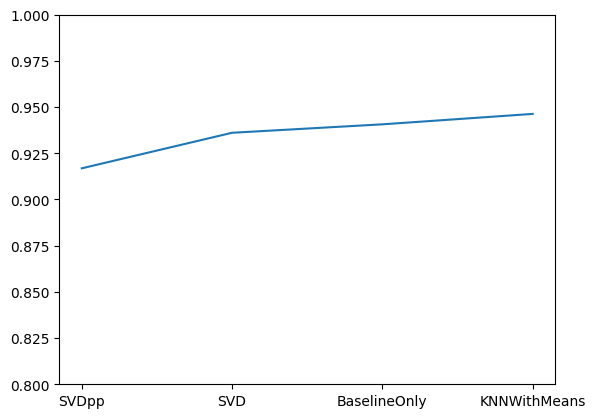

In [7]:
# 알고리즘 비교
algorithms = [BaselineOnly, KNNWithMeans, SVD, SVDpp]

names = []
results = []

for option in algorithms:
    algo = option()
    names.append(option.__name__)
    algo.fit(trainset)
    predictions = algo.test(testset)
    results.append(accuracy.rmse(predictions))
names = np.array(names)
results = np.array(results)

index = np.argsort(results)
plt.ylim(0.8,1)
plt.plot(names[index], results[index])
results[index]

### 5.3 알고리즘 옵션 지정

In [8]:
sim_options = {'name':'pearson_baseline', 'user_based': True}
algo = KNNWithMeans(k = 30, sim_options = sim_options)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9351


0.9350696129852613

### 5.4 다양한 조건의 비교

In [10]:
result = []
for neighbor_size  in (10,20,30,40,50,60):
    algo = KNNWithMeans(k = neighbor_size,
                        sim_options = {'name':'pearson_baseline',
                                       'user_based':True})
    algo.fit(trainset)
    predictions = algo.test(testset)
    result.append([neighbor_size, accuracy.rmse(predictions)])

result

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9486
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9368
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9351
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9351
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9351
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9357


[[10, 0.9485599566510055],
 [20, 0.9367662244320846],
 [30, 0.9350696129852613],
 [40, 0.9350789573562147],
 [50, 0.9351448905411563],
 [60, 0.9356531235926642]]

In [12]:
# grid search 모듈 가져오기
from surprise.model_selection import GridSearchCV

In [13]:
param_grid = {
    'k' : [5,10,15,25],
    'sim_options':{
        'name':['pearson_baseline', 'cosine'],
        'user_based':[True, False]
    }
}

gs = GridSearchCV(KNNWithMeans,
                  param_grid,
                  measures = ['rmse'],
                  cv = 4)

gs.fit(data)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similar

In [14]:
# 최적 rmse cnffur
print(gs.best_score['rmse'])

# 최적 rmse의 parameter 출력
print(gs.best_params['rmse'])

0.9255425821763026
{'k': 25, 'sim_options': {'name': 'pearson_baseline', 'user_based': False}}


In [ ]:
# SVD 다양한 파라미터 비교
from surprise import SVD
from surprise.model_selection import GridSearchCV

param_grid = {
    'n_epochs': [70,80,90],
    'lr_all': [0.005, 0.006, 0.007],
    'reg_all': [0.05, 0.07, 0.1]
}

gs = GridSearchCV(algo_class = SVD,
                  param_grid = param_grid,
                  measures = ['rmse'],
                  cv = 4)

gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

### 5.5 외부데이터 사용

In [15]:
import pandas as pd
from surprise import Reader
from surprise import Dataset

In [16]:
r_cols = ['user_id','movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('../data/u.data',
                      names = r_cols,
                      sep = "\t",
                      encoding='latin-1')
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(ratings[['user_id', 'movie_id', 'rating']], reader)

In [18]:
data